<a href="https://colab.research.google.com/github/ianbounos/Neural-Networks-Introduction/blob/main/NN_Sort_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Can a feedforward neural network learn to sort integers?

What we are questioning in this notebook is whether it is possible for a feedforward neural network to learn to order fixed-size vectors. It is clear that in theory, this is possible due to the universal approximation theorem; however, we want to observe it in practice.

To do this, we define a fully connected neural network with three layers that takes a vector of size three as input and returns another vector of size three.

We train it with triplets of integers between 0 and 100, simulated, and observe the outcomes.

1/1 [==============================] - 0s 68ms/step
Input vector: [[3 1 2]]
Sorted vector: [[1.041336  2.0033839 2.996291 ]]


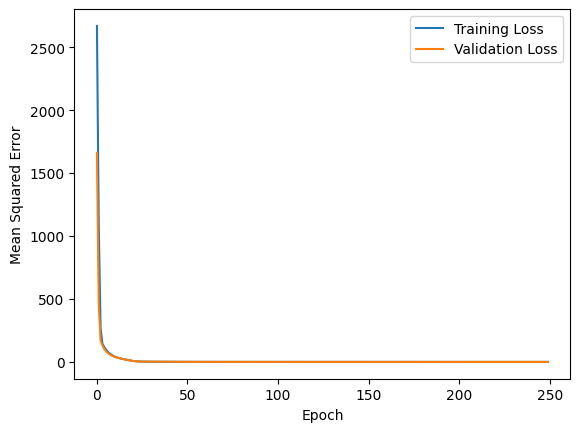

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Set seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Function to generate training data
def generate_training_data(num_samples):
    input_data = []
    output_data = []

    for _ in range(num_samples):
        # Generate a vector of size three with random values
        unsorted_vector = np.random.randint(1, 100, size=3)

        # Save the unordered vector
        input_data.append(unsorted_vector)

        # Save the sorted vector
        sorted_vector = np.sort(unsorted_vector)
        output_data.append(sorted_vector)

    return np.array(input_data), np.array(output_data)

# Generate 1000 examples of training data
num_samples = 1000
input_data, output_data = generate_training_data(num_samples)

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='linear')  # Final layer without activation to obtain continuous values
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store the history
history = model.fit(input_data, output_data, epochs=250, batch_size=32, verbose = 0, validation_split=0.2)

# Use the model to sort a new vector
new_vector = np.array([[3, 1, 2]])
sorted_vector = model.predict(new_vector)

print("Input vector:", new_vector)
print("Sorted vector:", sorted_vector)

# Plot the training and validation error over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


Let's test it on randomly generated data.

In [3]:
# Generate 200 examples of test data
num_test_samples = 200
test_input_data, test_output_data = generate_training_data(num_test_samples)

# Evaluate the model on the test dataset
test_loss = model.evaluate(test_input_data, test_output_data)
print(f'Test Loss: {test_loss}')

# Use the model to make predictions on the test dataset
predicted_output_data = model.predict(test_input_data)


7/7 [==============================] - 0s 2ms/step - loss: 0.0445
Test Loss: 0.0445016473531723
7/7 [==============================] - 0s 2ms/step


The cost function doesn't have a very clear interpretation, so we will observe what it does with a known vector within the training range (from 0 to 100).

In [4]:
# Use the model to sort a new vector
new_vector = np.array([[3, 1, 2]])
sorted_vector = model.predict(new_vector)
sorted_vector

1/1 [==============================] - 0s 16ms/step


array([[1.041336 , 2.0033839, 2.996291 ]], dtype=float32)

It works relatively well. Let's test it on a vector far from the training range to see if the order is preserved.

In [8]:
new_vector_outside = np.array([[30000, 100000, 25000]])
sorted_vector_outside = model.predict(new_vector)
sorted_vector_outside

1/1 [==============================] - 0s 17ms/step


array([[ 247.09026,  301.3269 , 1000.3823 ]], dtype=float32)


Now let's examine the process in more detail. We test it on randomly generated data, round the output, and observe the distribution of how many digits it gets correct.

In [7]:
# Count the number of exact matches for each level of correct predictions
correct_predictions = np.sum(np.sum(rounded_predicted_output_data == test_output_data, axis=1) == 3)
correct_2_predictions = np.sum(np.sum(rounded_predicted_output_data == test_output_data, axis=1) == 2)
correct_1_predictions = np.sum(np.sum(rounded_predicted_output_data == test_output_data, axis=1) == 1)
correct_0_predictions = np.sum(np.sum(rounded_predicted_output_data == test_output_data, axis=1) == 0)

# Calculate accuracy for each level
accuracy_3 = correct_predictions / num_test_samples * 100
accuracy_2 = correct_2_predictions / num_test_samples * 100
accuracy_1 = correct_1_predictions / num_test_samples * 100
accuracy_0 = correct_0_predictions / num_test_samples * 100

# Print accuracy for each level
print(f'Accuracy (All Numbers Correct): {accuracy_3:.2f}%')
print(f'Accuracy (2 Numbers Correct): {accuracy_2:.2f}%')
print(f'Accuracy (1 Number Correct): {accuracy_1:.2f}%')
print(f'Accuracy (None Correct): {accuracy_0:.2f}%')

Accuracy (All Numbers Correct): 91.00%
Accuracy (2 Numbers Correct): 9.00%
Accuracy (1 Number Correct): 0.00%
Accuracy (None Correct): 0.00%
